# Linear Regression

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points.

Here i am using insurence data from a company. **file name: 10_insurancedata.xlsx**

Data set is explored in the descriptive stastistics section.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 10_insurancedata.xlsx to 10_insurancedata.xlsx


I used Colab for coding, so we will upload the file by running the above code. The uploaded dataset will be stored in Colab cloud storage or we can mount our google drive to save the file. Here I am not mounting the drive and loading to a data frame directly from the cloud space.


In [0]:
import io
import pandas as pd
lr1 = pd.read_excel(io.BytesIO(uploaded['10_insurancedata.xlsx']))

using pandas and io libraries, the uploaded dataset will copyed to the dataframe lr1.

In [0]:
print(lr1.shape)  # give number of columns and rows in the dataset.

(620, 5)


In [0]:
print(lr1.describe())   # provide detailed tabular descriptive statistics of the data, 
                        # which include - mean, standard deviation, max,min, count and percentile data.

         district     percapgdp  avgcancerspend
count  620.000000    620.000000      620.000000
mean   310.500000  45030.381745   378023.611985
std    179.122863  10363.028564   136983.995348
min      1.000000  19154.741670   119999.545400
25%    155.750000  37054.194693   263714.761025
50%    310.500000  47180.536255   393918.785100
75%    465.250000  52953.185985   490550.758725
max    620.000000  68366.672160   644532.690500


In [0]:
print(lr1.head())  #List first five rows of the dataframe

   district region  spendtype    percapgdp  avgcancerspend
0         1  North  Insurance  54822.32372     354097.0520
1         2  North  Insurance  44447.65969     423805.8963
2         3  North  Insurance  47444.91232     339665.6173
3         4  North  Insurance  40322.25256     384887.2437
4         5  North  Insurance  49366.17764     362895.3526


In [0]:
print(list(lr1.columns)) # return the columns names

['district', 'region', 'spendtype', 'percapgdp', 'avgcancerspend']


In [0]:
print(lr1.dtypes)  #return columns names with data types

district            int64
region             object
spendtype          object
percapgdp         float64
avgcancerspend    float64
dtype: object


Descriptive statistics is provided above. The data set is conssists of 620 rows and 5 features. To plot the regression we are using the columns "percapgdp" and "avgcancerspend". Both selected features are of float datatype.

In [0]:
import numpy as np
percapgdp=lr1[['percapgdp']].to_numpy()
avgcancerspend=lr1[['avgcancerspend']].to_numpy()

In order to perform regression and to create scater plot, we will convert the two selected columns in to two different numpy array using numpy library

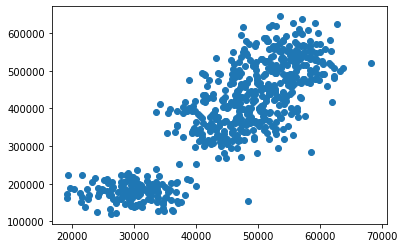

In [0]:
scatter(percapgdp,avgcancerspend) # scatter plot of percapgdp and avgcancerspend

In [0]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(percapgdp[:,0], avgcancerspend[:,0])

We can calculate the slope, intercept, r-value, p-value std_err using stats in scipy library. The "stats.linregress" function will return the specified values for percapgdp and avgcancerspend

In [0]:
print(slope)          #represents the rate of change in avgcancerspend as percapgdp changes.
print(intercept)      #is just the predicted value for avgcancerspend, when percapgdp is 0
print(r_value)
print(std_err)        #represents the average distance that the observed values fall from the regression line.
print(p_value)

11.206071107367334
-126590.0478464851
0.8477547663584268
0.28202195205774144
2.381383525587354e-172


In [0]:
r_value ** 2      #measure of how close the data are to the fitted regression line. It defines the variability. 

0.7186881438834308

The R-squared value is 0.718, which is not a good fit either a bad one. Though our model is not very precise

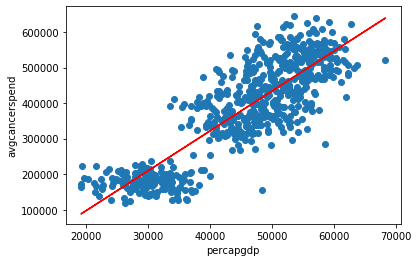

In [0]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(percapgdp)

plt.scatter(percapgdp, avgcancerspend)
plt.plot(percapgdp, fitLine, c='r')
plt.xlabel('percapgdp')
plt.ylabel('avgcancerspend')
plt.show()

Using matplotlib pypolt we will fit the regression line to the scatter plot between predicted values vs. observed. The straight line indicating our algorithm is correct. Even though We can see that the straight line is unable to capture the complete patterns in the data. Here using the polinomial regression will be more effective.